# Fundamentals of Computer Science - PERCEPTUAL BISTABILITY

In [2]:
#Import all the required modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Exercise 1
#### In this exercise we will explore a model of binocular rivalry presented by Laing and Chow (2002).While their paper included a spiking network model, we will concern ourselves only with their reduced population rate model.

In [9]:
#OPTION ONE 
u1 = 1; a1 = 0.1; u2 = 0; a2 = 0.25
#t = np.linspace(0,500,num=200)
t = np.arange(700,1000,1)
x_0 = [u1, a1, u2, a2]; # initial conditions
I1 = 0.43; I2 = 0.5;
I = (I1,I2)

def  laing_chow (val, t, I1, I2) :
    alpha = 0.2 ; beta = 0.4; phi = 0.4; tau = 20 ; g1 = 1; g2 = 1;
    u1,a1,u2,a2 = val
    du1dt = - u1 + np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,0 )
    du2dt = - u2 + np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,0)  
    da1dt = (1/tau)* (-a1 + phi*np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,0))
    da2dt = (1/tau)* (-a2 + phi*np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,0))
    y = [du1dt , du2dt, da1dt, da2dt]
    return y

sol = odeint(laing_chow, x_0, t, args=(I1,I2))
sol
u1 = sol [:,0]; u2 = sol [:,1]; a1 = sol [:,2]; a2 = sol [:,3]

np.size(sol)

C:\Users\laura\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


1200

In [8]:
# OPTION TWO
x_0 = [u1, a1, u2, a2]; # initial conditions
I1 = 0.43; I2 = 0.5;

def f(x) :
    if (x<0) :
        y = 0;
    else :
        y = 1;
    return y

def  laing_chow (val, t, I1, I2) :
    alpha = 0.2 ; beta = 0.4; phi = 0.4; tau = 20 ; g1 = 1; g2 = 1;
    u1,a1,u2,a2 = val;
    du1dt = - u1 + f(alpha*u1*g1 - beta*u2*g2 - a1 + I1)
    du2dt = - u2 + f(alpha*u2*g2 - beta*u1*g1 - a2 + I2)  
    da1dt = (1/tau)* (-a1 + phi*f(alpha*u1*g1 - beta*u2*g2 - a1 + I1))
    da2dt = (1/tau)* (-a2 + phi*f(alpha*u2*g2 - beta*u1*g1 - a2 + I2))
    y = [du1dt , du2dt, da1dt, da2dt]
    return y

sol = odeint(laing_chow, x_0, t, args=(I1,I2))
plt.plot(sol[:,0])

ValueError: Initial condition y0 must be one-dimensional.

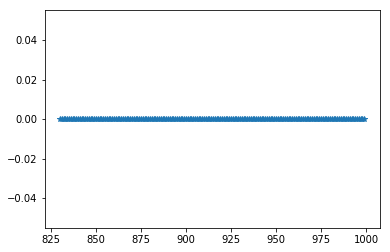

In [6]:
#Population active if u1 > u2
x1 = u1 > u2; #p1 is active when x1 = 1
x2 = u2 > u1; #p2 is active when x2 = 1
def dominance_durations(x1,x2,t) :
    D1 = t[x1];
    D2 = t[x2];
    return D1,D2

D1,D2 = dominance_durations(x1,x2,t)
plt.plot(t[x1==0],x1[x1==0],'*')